<a href="https://colab.research.google.com/github/vvrgit/NLP-LAB/blob/main/Text_Similarity_Lab_Assignmnet_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

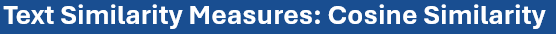

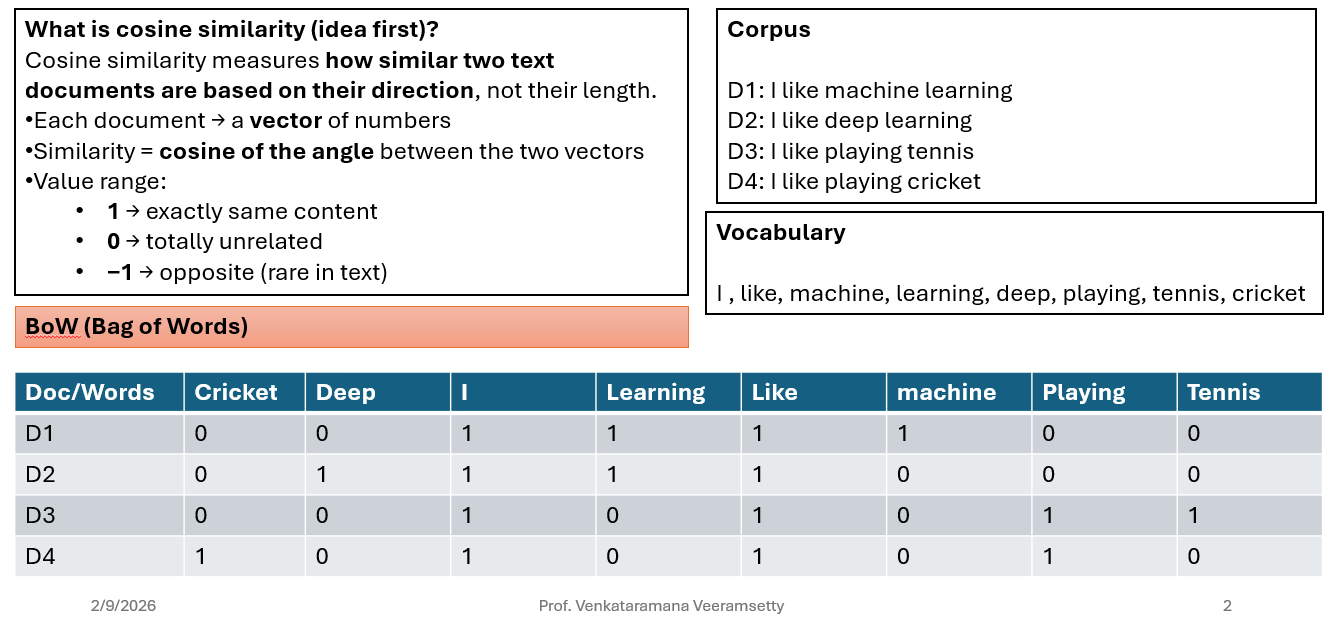

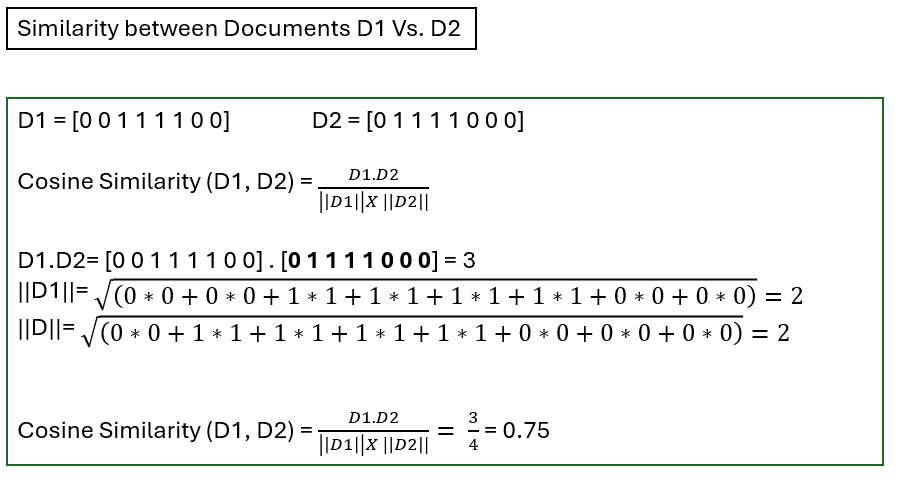

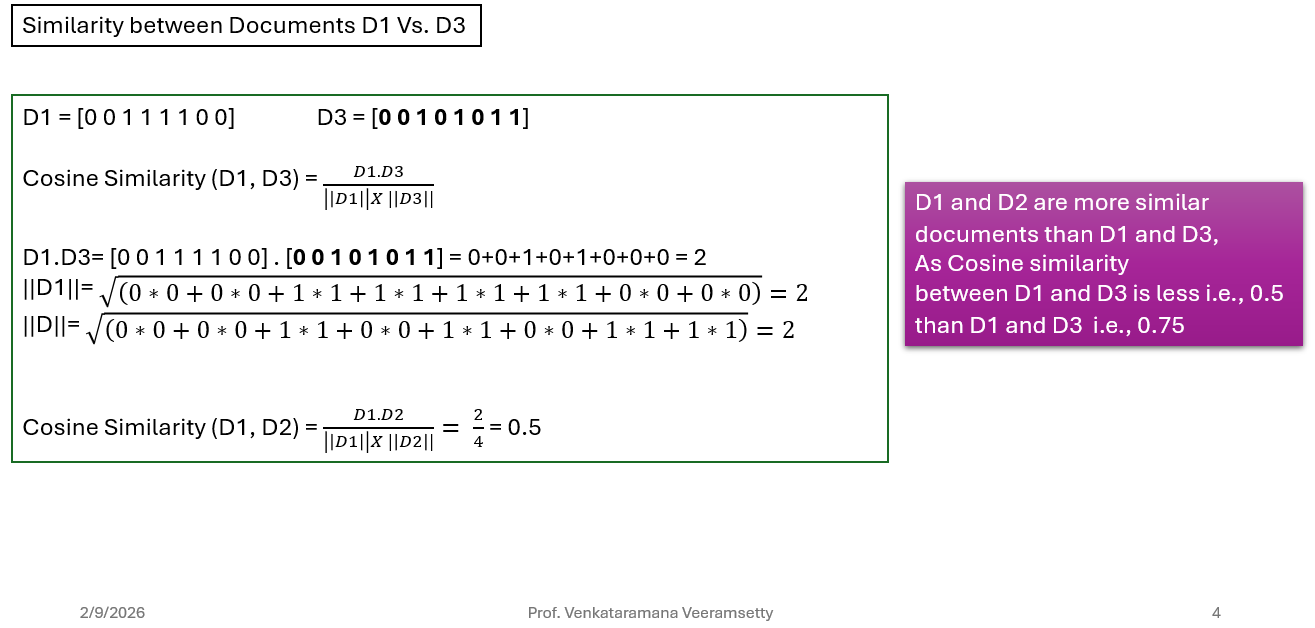

In [2]:
D1="I like machine learning"
D2="I like deep learning"
D3="I like playing tennins"
D4="I like playing cricket"

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

documents = [D1, D2, D3, D4]

# Initialize TfidfVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words="english")

# Fit and transform the documents
bow = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame for better readability
df_bow = pd.DataFrame(bow.toarray(), columns=feature_names)

print("Bag of Words (TF-IDF) Representation:")
print(df_bow)

Bag of Words (TF-IDF) Representation:
   cricket  deep  learning  machine  playing  tennins
0        0     0         1        1        0        0
1        0     1         1        0        0        0
2        0     0         0        0        1        1
3        1     0         0        0        1        0


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calculate cosine similarity between documents
cosine_sim_matrix = cosine_similarity(df_bow)

# Convert to DataFrame for better readability
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=[D1,D2,D3,D4], columns=[D1,D2,D3,D4])

print("Cosine Similarity Matrix:")
print(df_cosine_sim)

Cosine Similarity Matrix:
                         I like machine learning  I like deep learning  \
I like machine learning                      1.0                   0.5   
I like deep learning                         0.5                   1.0   
I like playing tennins                       0.0                   0.0   
I like playing cricket                       0.0                   0.0   

                         I like playing tennins  I like playing cricket  
I like machine learning                     0.0                     0.0  
I like deep learning                        0.0                     0.0  
I like playing tennins                      1.0                     0.5  
I like playing cricket                      0.5                     1.0  


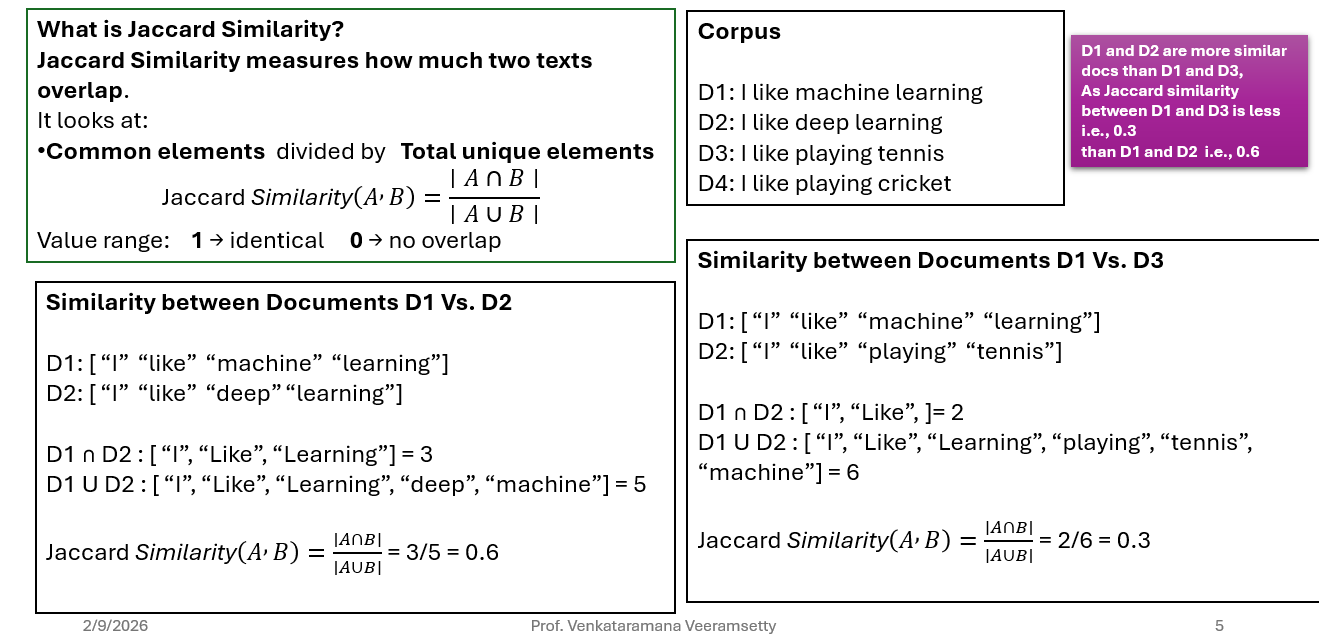

In [9]:
from sklearn.metrics import jaccard_score
import numpy as np
import pandas as pd

# Convert BOW matrix to binary (presence/absence) for Jaccard similarity
binary_bow = (df_bow > 0).astype(int)

# Calculate Jaccard Similarity
num_documents = binary_bow.shape[0]
jaccard_sim_matrix = np.zeros((num_documents, num_documents))

for i in range(num_documents):
    for j in range(num_documents):
        # For Jaccard similarity, we can use the jaccard_score which computes 1 - Jaccard distance
        # However, jaccard_score expects 1D arrays for binary classification tasks.
        # To compute similarity between two sets represented as binary vectors,
        # we can calculate (intersection_size / union_size)

        # Get the binary vectors for documents i and j
        vec_i = binary_bow.iloc[i]
        vec_j = binary_bow.iloc[j]

        # Calculate intersection and union
        intersection = np.sum(np.logical_and(vec_i, vec_j))
        union = np.sum(np.logical_or(vec_i, vec_j))

        if union == 0:
            jaccard_sim_matrix[i, j] = 0.0 # If both sets are empty, similarity is 0
        else:
            jaccard_sim_matrix[i, j] = intersection / union

# Convert to DataFrame for better readability
df_jaccard_sim = pd.DataFrame(jaccard_sim_matrix, index=documents, columns=documents)

print("Jaccard Similarity Matrix:")
print(df_jaccard_sim)

Jaccard Similarity Matrix:
                         I like machine learning  I like deep learning  \
I like machine learning                 1.000000              0.333333   
I like deep learning                    0.333333              1.000000   
I like playing tennins                  0.000000              0.000000   
I like playing cricket                  0.000000              0.000000   

                         I like playing tennins  I like playing cricket  
I like machine learning                0.000000                0.000000  
I like deep learning                   0.000000                0.000000  
I like playing tennins                 1.000000                0.333333  
I like playing cricket                 0.333333                1.000000  


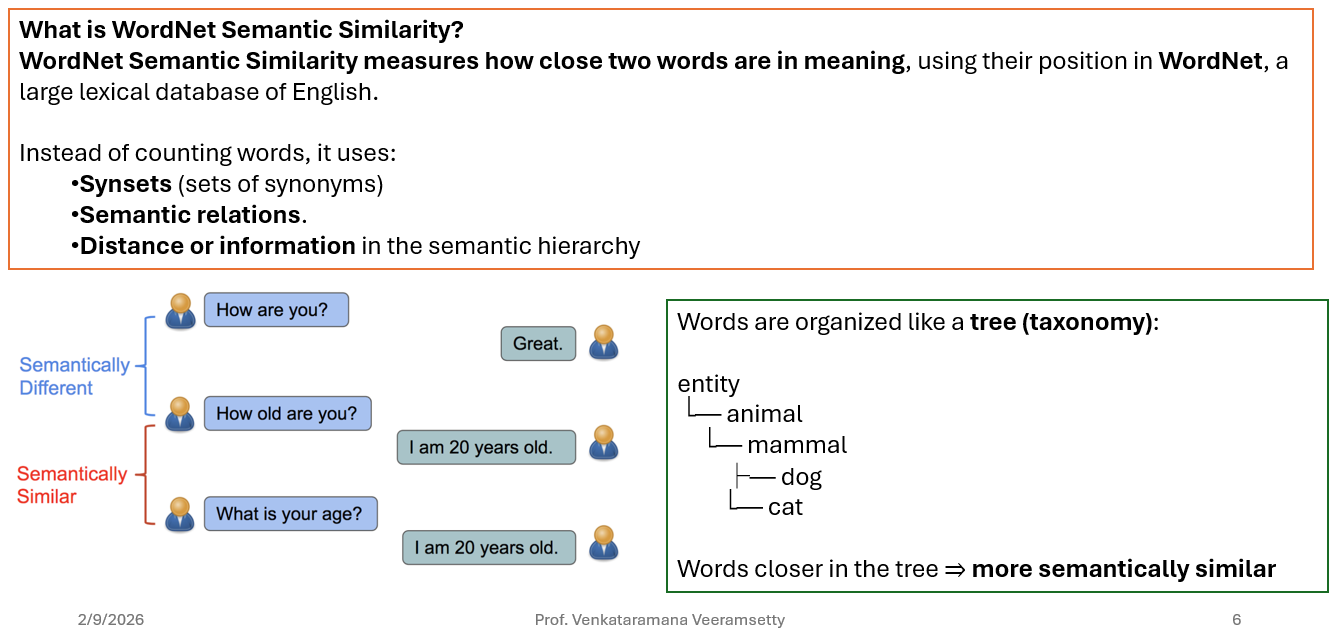

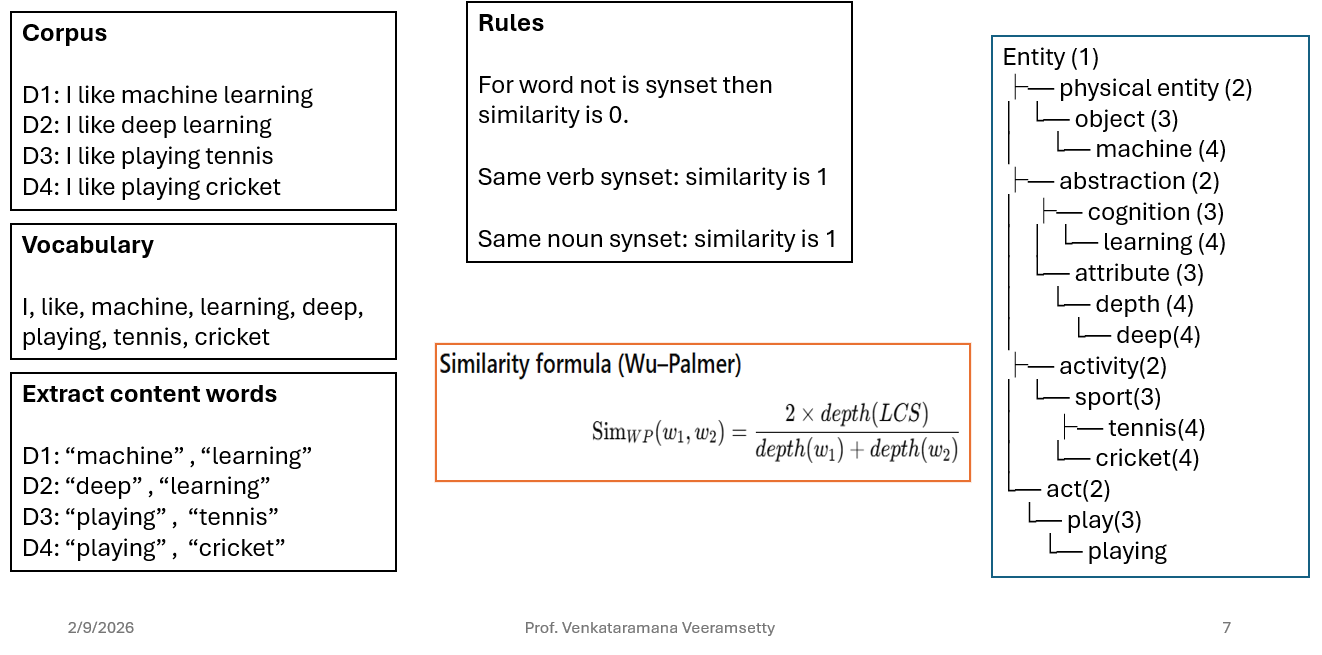

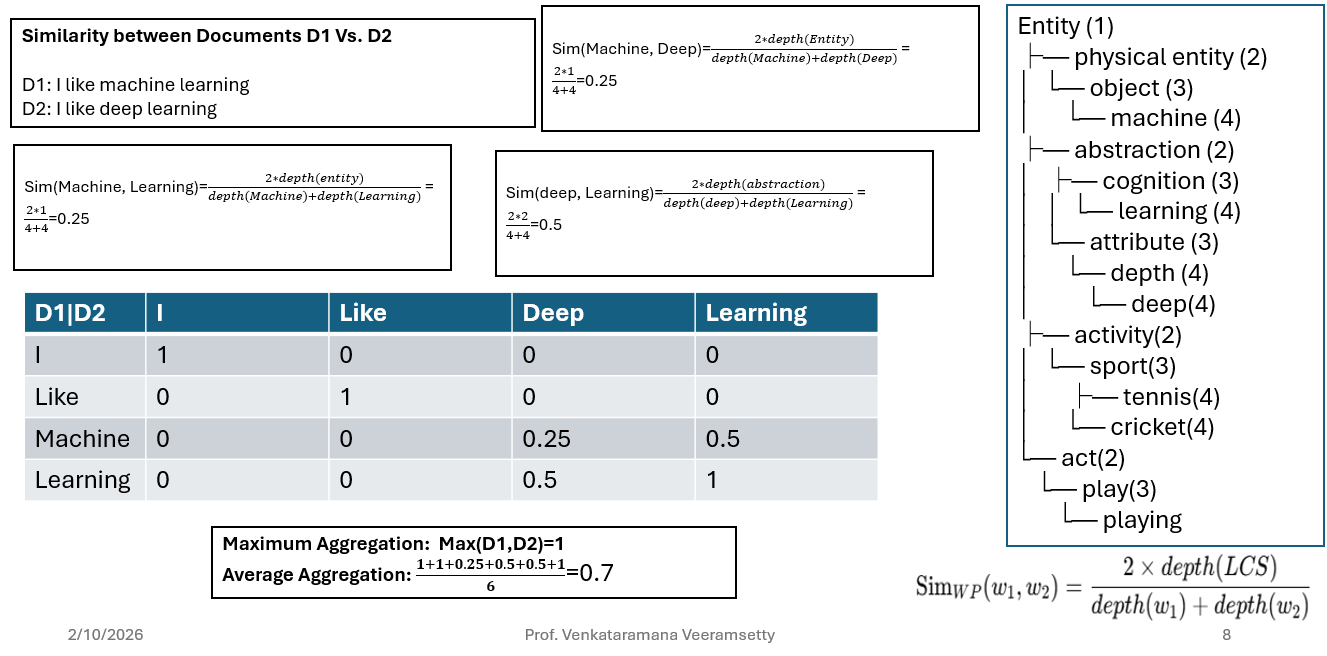

In [8]:
D1="I like machine learning"
D2="I like deep learning"
D3="I like playing tennins"
D4="I like playing cricket"
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

def document_wordnet_similarity(doc1, doc2):
    tokens1 = word_tokenize(doc1.lower())
    tokens2 = word_tokenize(doc2.lower())

    synsets1 = [s for token in tokens1 for s in wordnet.synsets(token)]
    synsets2 = [s for token in tokens2 for s in wordnet.synsets(token)]

    if not synsets1 or not synsets2:
        return 0.0

    # Calculate pairwise similarity and take the maximum for each pair
    max_similarities = []
    for s1 in synsets1:
        max_sim_for_s1 = 0.0
        for s2 in synsets2:
            sim = s1.path_similarity(s2)
            if sim is not None and sim > max_sim_for_s1:
                max_sim_for_s1 = sim
        max_similarities.append(max_sim_for_s1)

    # Average the maximum similarities (simple approach)
    if max_similarities:
        return np.mean(max_similarities)
    else:
        return 0.0

# Prepare documents list
documents = [D1, D2, D3, D4]

# Calculate WordNet similarity matrix
num_documents = len(documents)
wordnet_sim_matrix = np.zeros((num_documents, num_documents))

for i in range(num_documents):
    for j in range(num_documents):
        if i == j:
            wordnet_sim_matrix[i, j] = 1.0
        else:
            wordnet_sim_matrix[i, j] = document_wordnet_similarity(documents[i], documents[j])

df_wordnet_sim = pd.DataFrame(wordnet_sim_matrix, index=documents, columns=documents)

print("WordNet Similarity Matrix (Path Similarity):")
print(df_wordnet_sim)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


WordNet Similarity Matrix (Path Similarity):
                         I like machine learning  I like deep learning  \
I like machine learning                 1.000000              0.779366   
I like deep learning                    0.667614              1.000000   
I like playing tennins                  0.439166              0.439166   
I like playing cricket                  0.422568              0.421958   

                         I like playing tennins  I like playing cricket  
I like machine learning                0.584023                0.584023  
I like deep learning                   0.529798                0.529798  
I like playing tennins                 1.000000                1.000000  
I like playing cricket                 0.959184                1.000000  


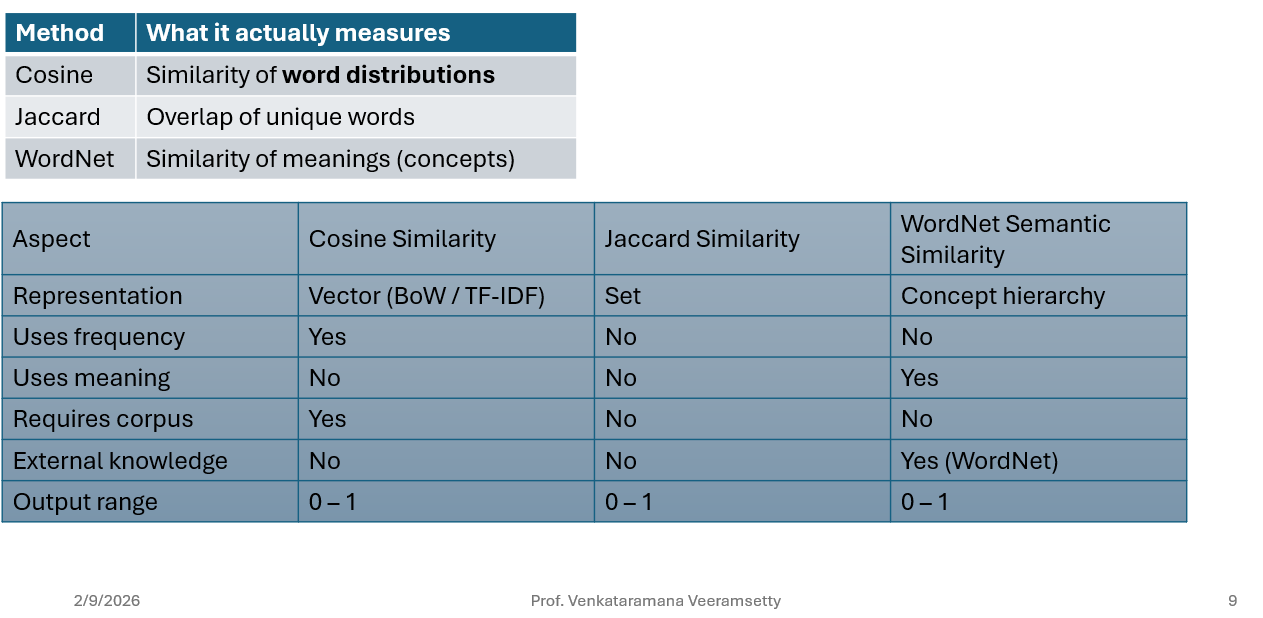

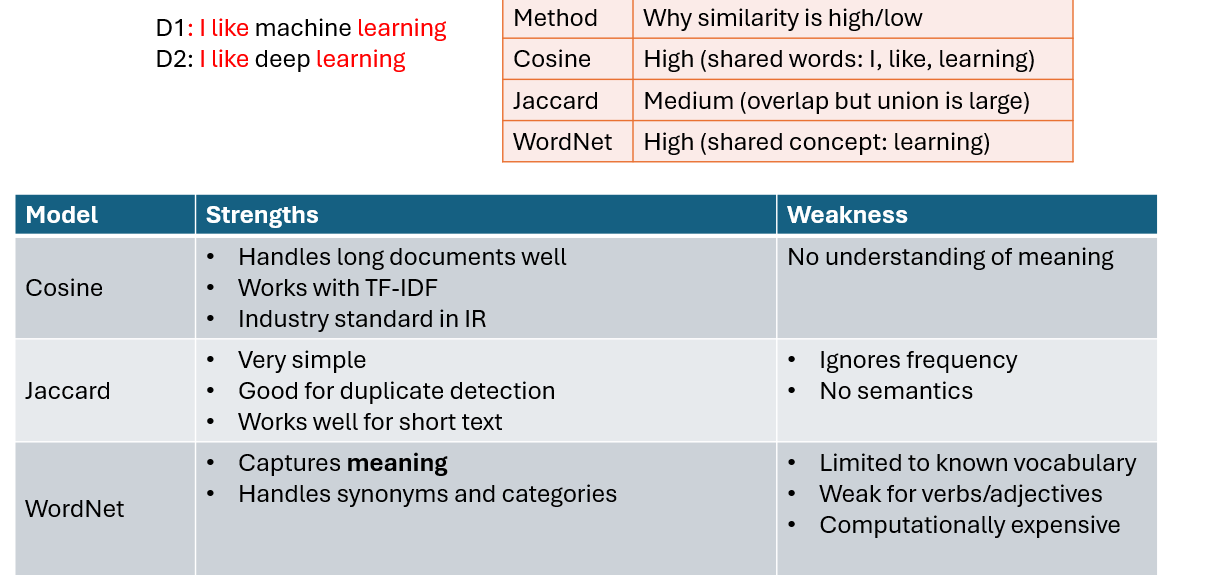

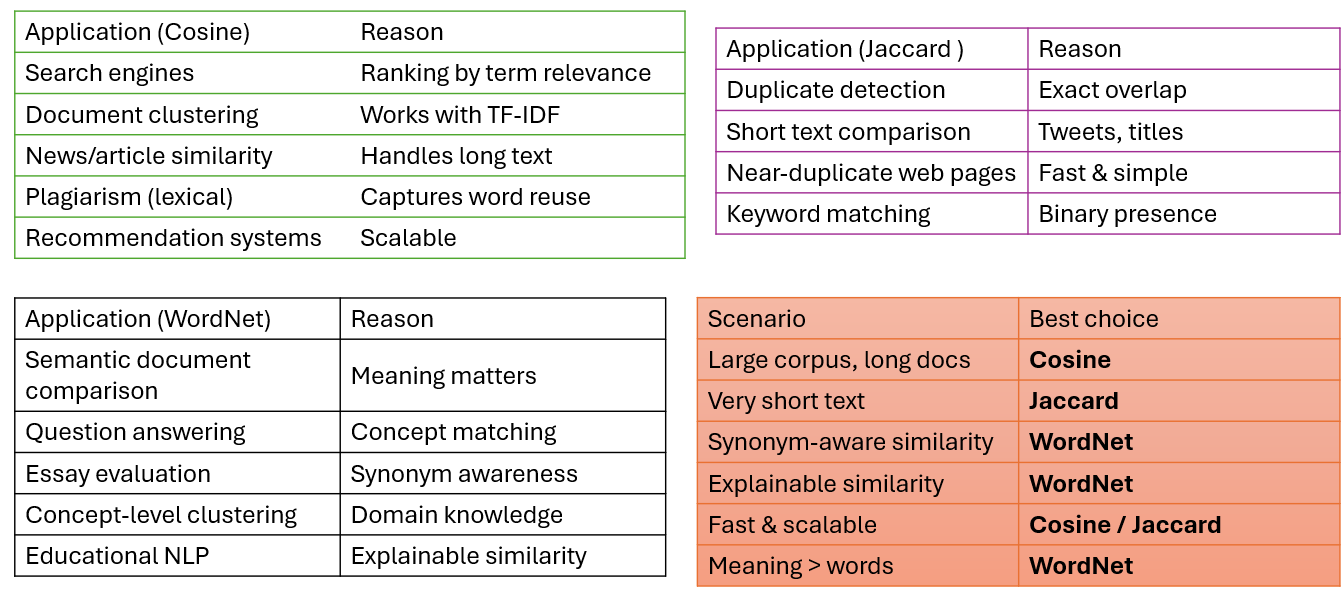